### RNN Layer: SimpleRNN()
1. `return_sequences:Boolean->`Whether to return the last output in the output sequence, or the full sequence. Default: False.

In [1]:
# import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


In [3]:
layers = keras.layers
optimizers = keras.optimizers
losses = keras.losses
mnist = keras.datasets.mnist

In [4]:
BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 5

In [5]:
history = {}
test_score = {}

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0

In [45]:
def SimpleRnn():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.SimpleRNN(512, return_sequences=True, activation="relu"))
    model.add(layers.SimpleRNN(512, activation="relu"))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [46]:
simple_rnn_model=SimpleRnn()
print(simple_rnn_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 512)         276992    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 806,922
Trainable params: 806,922
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
history['simple_rnn_model'] = simple_rnn_model.fit(
        x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=10, verbose=2
    )

Epoch 1/10


938/938 - 195s - loss: nan - accuracy: 0.0987 - 195s/epoch - 208ms/step
Epoch 2/10
938/938 - 186s - loss: nan - accuracy: 0.0987 - 186s/epoch - 199ms/step
Epoch 3/10
938/938 - 187s - loss: nan - accuracy: 0.0987 - 187s/epoch - 199ms/step
Epoch 4/10
938/938 - 187s - loss: nan - accuracy: 0.0987 - 187s/epoch - 200ms/step
Epoch 5/10
938/938 - 186s - loss: nan - accuracy: 0.0987 - 186s/epoch - 199ms/step
Epoch 6/10


In [10]:
test_score['simple_rnn_model'] = simple_rnn_model.evaluate(x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2)

157/157 - 2s - loss: nan - accuracy: 0.0980 - 2s/epoch - 14ms/step


In [11]:
def LSTM():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.LSTM(256, return_sequences=True, activation="tanh"))
    model.add(layers.LSTM(256, activation="tanh"))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [12]:
lstm_model = LSTM()
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         291840    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history['lstm_model'] = lstm_model.fit(
        x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
    )
test_score['lstm_model'] = lstm_model.evaluate(x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2)

Epoch 1/5
938/938 - 213s - loss: 2.6516 - accuracy: 0.1004 - 213s/epoch - 227ms/step
Epoch 2/5
938/938 - 198s - loss: 2.6336 - accuracy: 0.1000 - 198s/epoch - 211ms/step
Epoch 3/5
938/938 - 197s - loss: 2.6518 - accuracy: 0.1010 - 197s/epoch - 210ms/step
Epoch 4/5
938/938 - 196s - loss: 2.6151 - accuracy: 0.0997 - 196s/epoch - 209ms/step
Epoch 5/5
938/938 - 195s - loss: 2.6279 - accuracy: 0.0993 - 195s/epoch - 208ms/step
157/157 - 15s - loss: 2.4878 - accuracy: 0.1135 - 15s/epoch - 95ms/step


In [14]:
def LSTMBidirectional():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation="tanh")))
    model.add(layers.Bidirectional(layers.LSTM(256, activation="tanh")))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [15]:
lstm_bidirectional_model = LSTMBidirectional()
print(lstm_bidirectional_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, None, 512)        583680    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,163,722
Trainable params: 2,163,722
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history["lstm_bidirectional_model"] = lstm_bidirectional_model.fit(
    x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
)
test_score["lstm_bidirectional_model"] = lstm_bidirectional_model.evaluate(
    x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2
)

Epoch 1/5
938/938 - 521s - loss: 3.8123 - accuracy: 0.1021 - 521s/epoch - 555ms/step
Epoch 2/5
938/938 - 492s - loss: 3.3719 - accuracy: 0.1093 - 492s/epoch - 525ms/step
Epoch 3/5
938/938 - 489s - loss: 3.9729 - accuracy: 0.1099 - 489s/epoch - 522ms/step
Epoch 4/5
938/938 - 506s - loss: 3.3937 - accuracy: 0.1075 - 506s/epoch - 540ms/step
Epoch 5/5
938/938 - 486s - loss: 3.8664 - accuracy: 0.1085 - 486s/epoch - 518ms/step
157/157 - 34s - loss: 3.4968 - accuracy: 0.1005 - 34s/epoch - 216ms/step


In [17]:
def GRU():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.LSTM(256, return_sequences=True, activation="tanh"))
    model.add(layers.LSTM(256, activation="tanh"))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [18]:
gru_model = GRU()
print(gru_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history["gru_model"] = gru_model.fit(
    x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
)
test_score["gru_model"] = gru_model.evaluate(
    x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2
)

Epoch 1/5
938/938 - 216s - loss: 2.7743 - accuracy: 0.1006 - 216s/epoch - 230ms/step
Epoch 2/5
938/938 - 186s - loss: 2.7143 - accuracy: 0.1001 - 186s/epoch - 198ms/step
Epoch 3/5
938/938 - 169s - loss: 2.7404 - accuracy: 0.1006 - 169s/epoch - 180ms/step
Epoch 4/5
938/938 - 230s - loss: 2.7037 - accuracy: 0.1010 - 230s/epoch - 245ms/step
Epoch 5/5
938/938 - 177s - loss: 2.7088 - accuracy: 0.1000 - 177s/epoch - 189ms/step
157/157 - 18s - loss: 2.5211 - accuracy: 0.0980 - 18s/epoch - 117ms/step


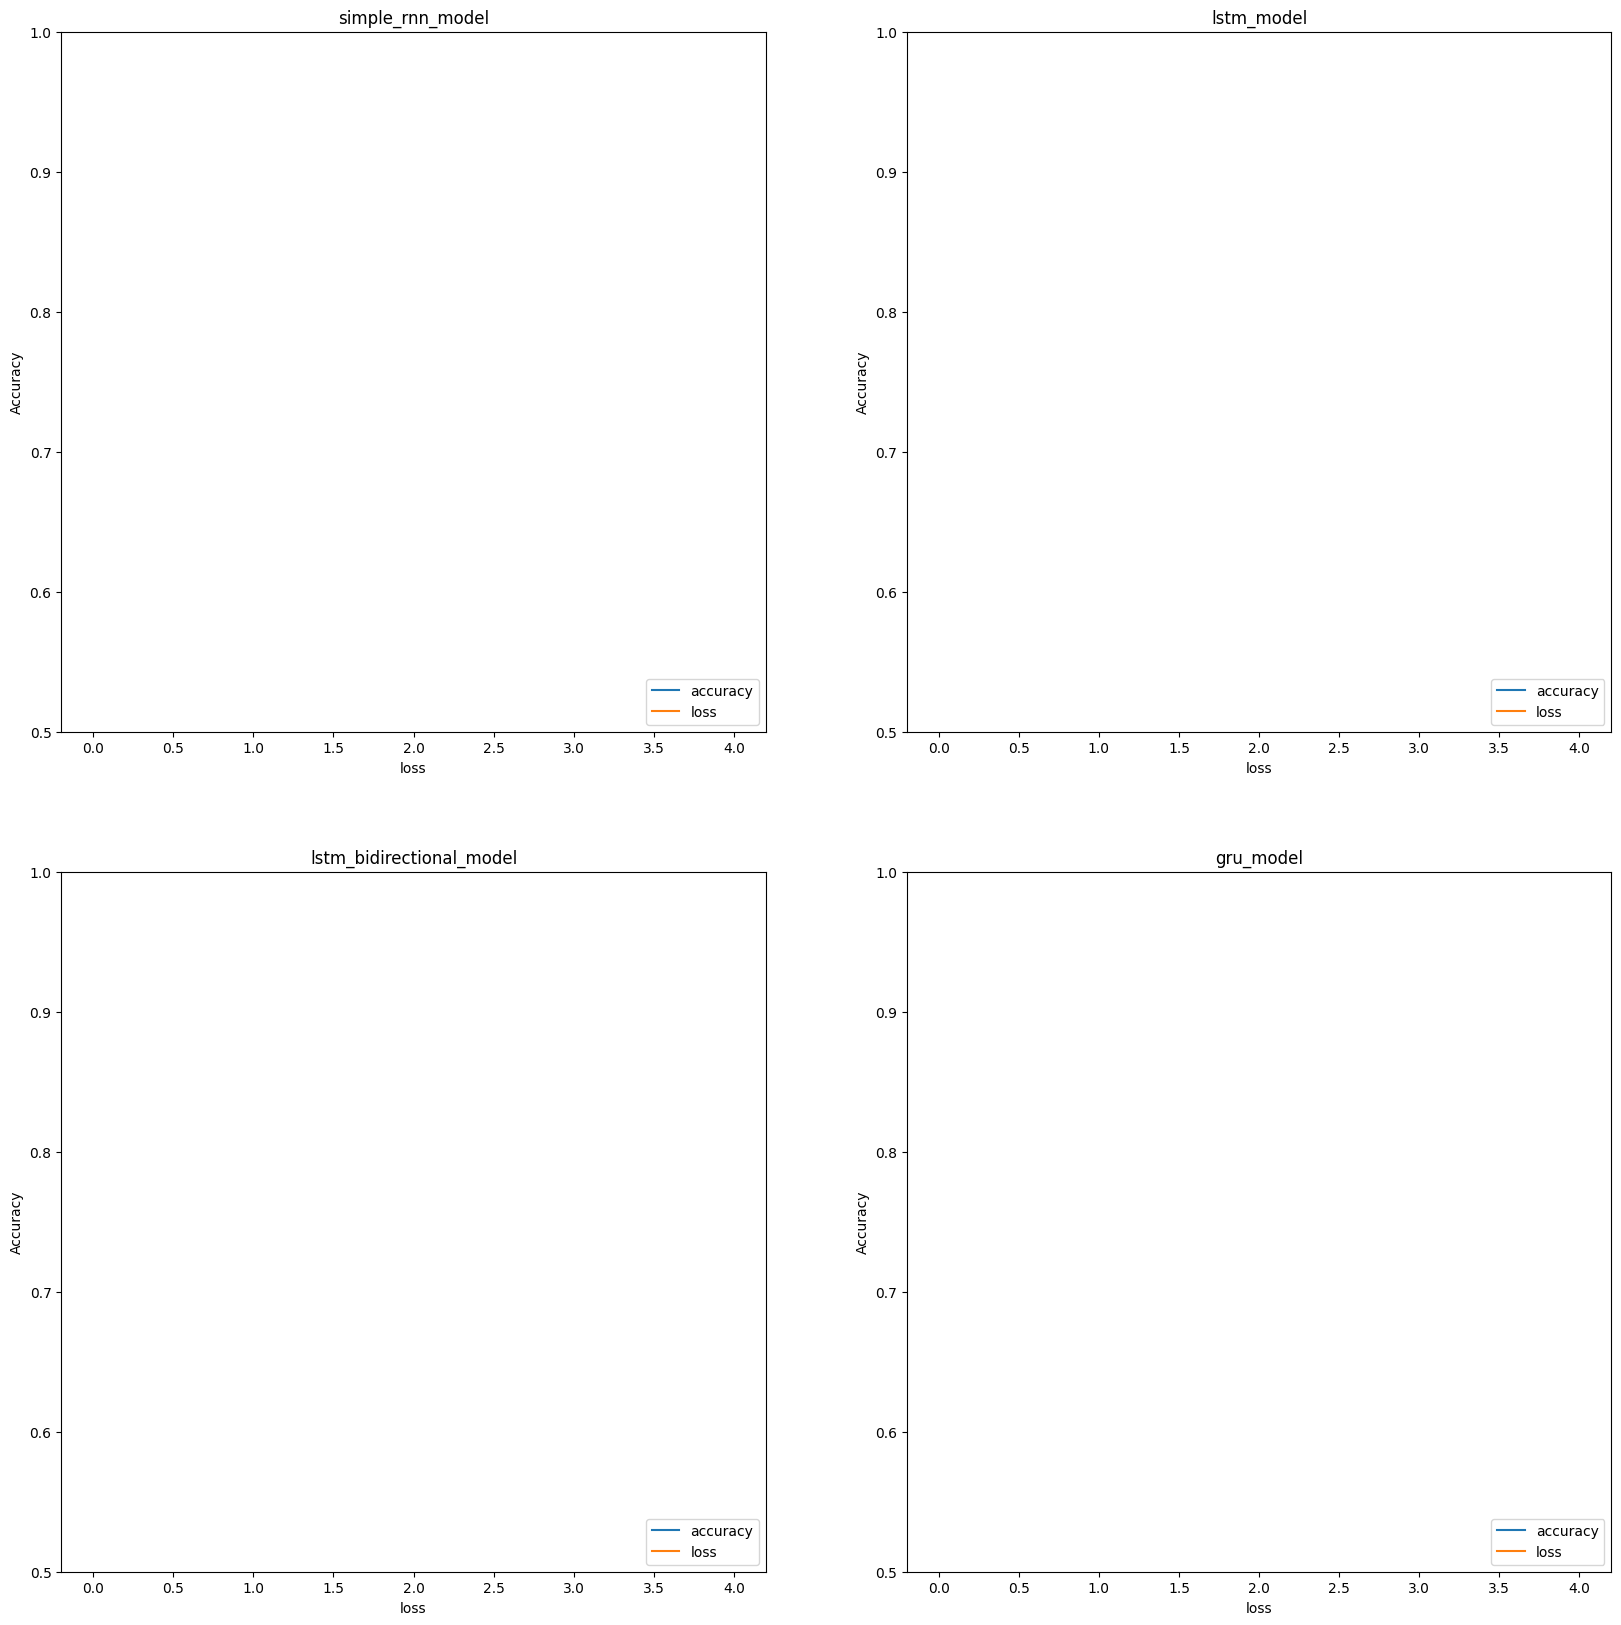

In [41]:
# visualize the model Accurecy
def plot_accurecy(history):
    plt.figure(figsize=(20,20))
    i=0
    for key, value in history.items():
        i = i+1
        plt.subplot(2,2, i)
        plt.plot(value.history['accuracy'], label='accuracy')
        plt.plot(value.history['loss'], label='loss')
        plt.xlabel('loss')
        plt.ylabel('Accuracy')

        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.title(key)
plot_accurecy(history)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


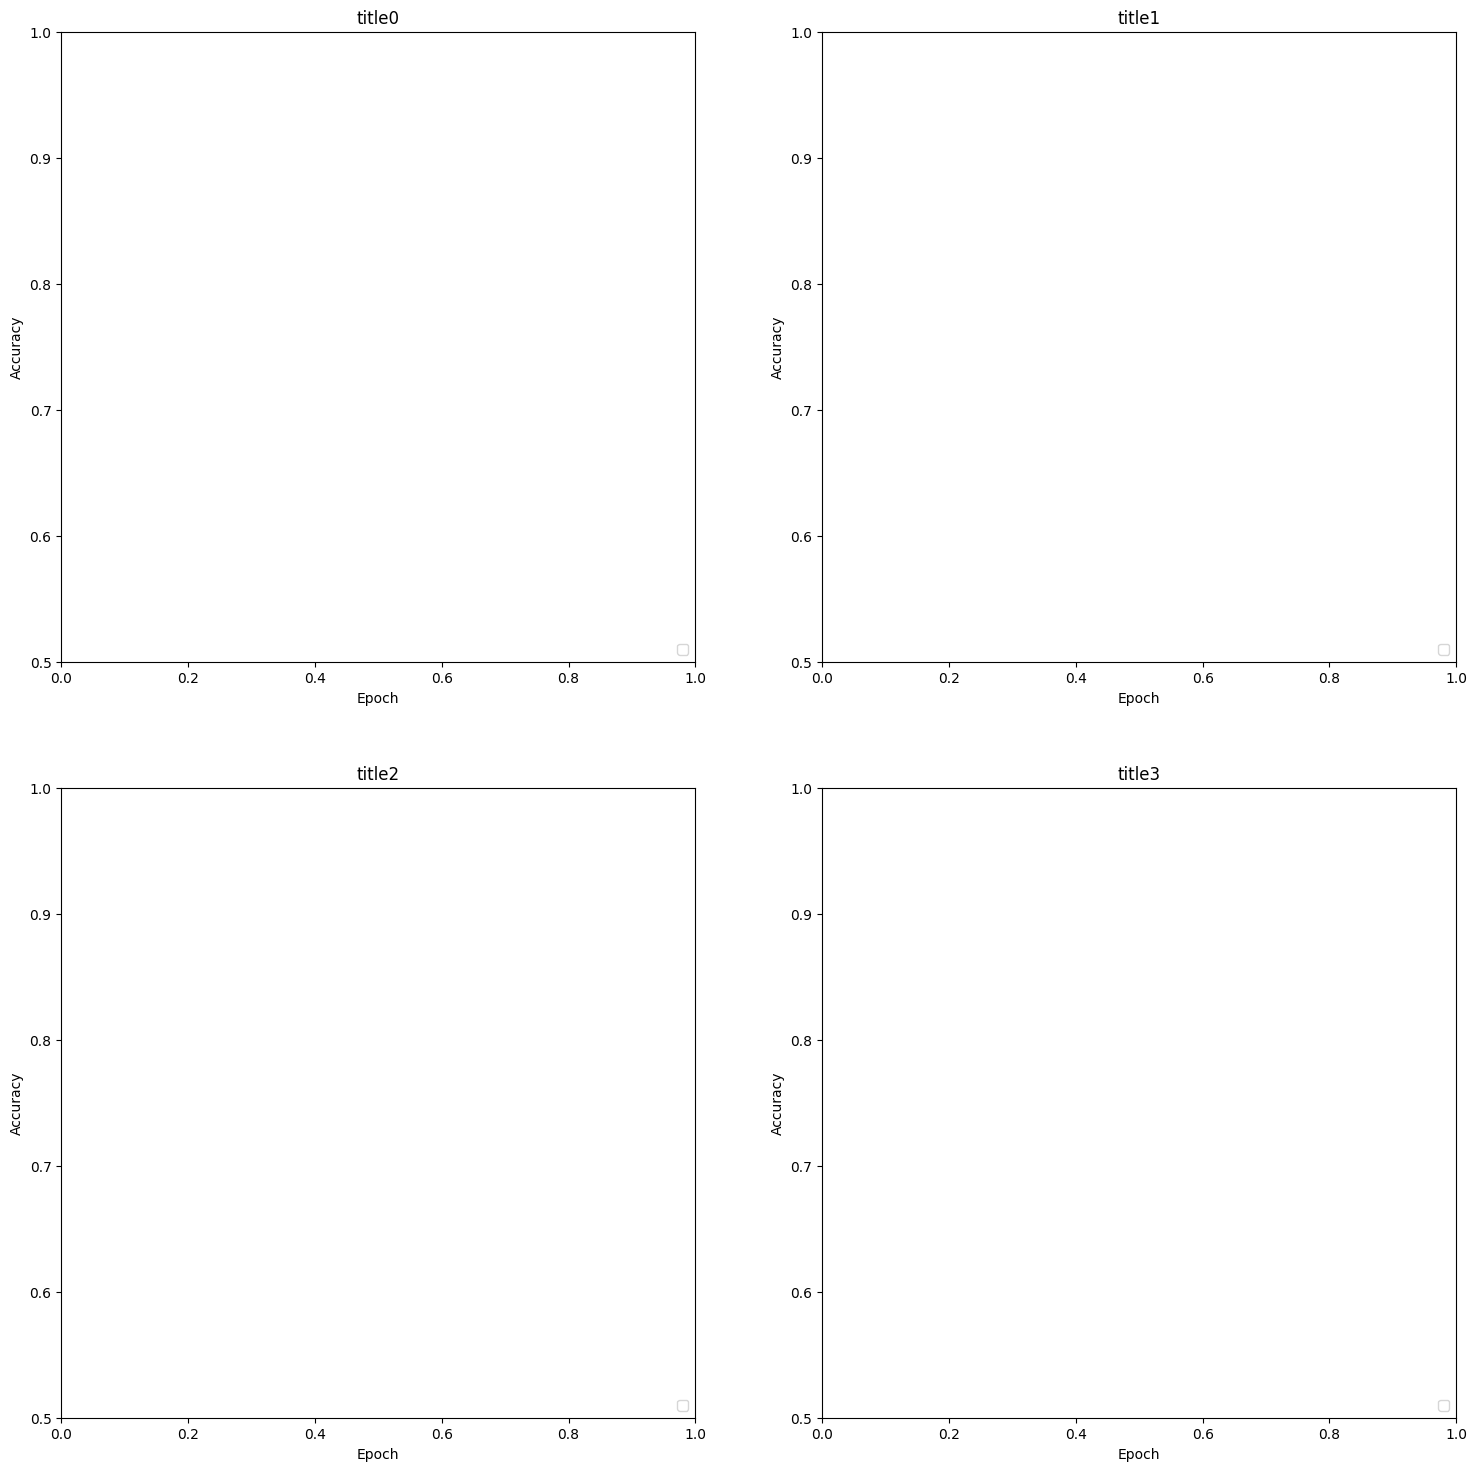

In [38]:
def plot_data():
    plt.figure(figsize=(18,18))
    for i in range(4):
        plt.subplot(2,2,i+1)
        # plt.xticks([])
        # plt.yticks([])
        # plt.grid(False)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')

        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.title("title"+str(i))
        # plt.imshow(images[i])
        # plt.xlabel(class_names[labels[i][0]])
    plt.show()
plot_data()

In [27]:
for key, value in history.items():
    print(key, value.history)

simple_rnn_model {'loss': [nan, nan, nan, nan, nan], 'accuracy': [0.09860000014305115, 0.09871666878461838, 0.09871666878461838, 0.09871666878461838, 0.09871666878461838]}
lstm_model {'loss': [2.651576519012451, 2.633624792098999, 2.6517531871795654, 2.6151065826416016, 2.6279070377349854], 'accuracy': [0.10041666775941849, 0.09996666759252548, 0.10095000267028809, 0.09969999641180038, 0.09931666404008865]}
lstm_bidirectional_model {'loss': [3.8123364448547363, 3.371900796890259, 3.972945213317871, 3.3936703205108643, 3.8663721084594727], 'accuracy': [0.10208333283662796, 0.10928333550691605, 0.10991666465997696, 0.10745000094175339, 0.10848333686590195]}
gru_model {'loss': [2.7743239402770996, 2.7143378257751465, 2.740424156188965, 2.703666925430298, 2.708811044692993], 'accuracy': [0.1005999967455864, 0.10014999657869339, 0.10063333064317703, 0.10098333656787872, 0.09995000064373016]}
